In [1]:
#data link = https://www.kaggle.com/c/digit-recognizer/data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
d0 = pd.read_csv('D:/Applied AI Course/13 DIMENSIONALITY REDUCTION AND VISUALIZATION/data/train.csv')

In [19]:
d0.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
l = d0['label']

In [16]:
d = d0.drop('label',axis=1)

In [20]:
d.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


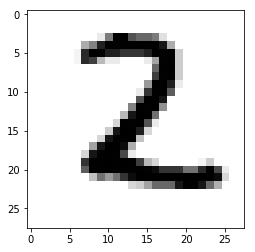

In [51]:
plt.figure(figsize=(4,4))
idx = 101

grid_data = d.iloc[idx].as_matrix().reshape(28,28)
#print(grid_data)
plt.imshow(grid_data,cmap = "binary")
plt.show()

In [54]:
print(l[idx])

2


In [55]:
labels = l.head(15000)
data = d.head(15000)

In [59]:
from sklearn.preprocessing import StandardScaler #importing from featurewise standardization

In [63]:
stand_data = StandardScaler().fit_transform(data)

In [65]:
stand_data.shape

(15000, 784)

In [67]:
covar_matrix = np.matmul(stand_data.T,stand_data)

In [69]:
covar_matrix.shape #(784*15000)*(15000*784) also known as S

(784, 784)

In [72]:
#TOP 2 eign values
from scipy.linalg import eigh
values,vectors = eigh(covar_matrix, eigvals=(782,783))

In [73]:
values

array([435532.55785282, 605719.29173629])

In [80]:
print(vectors.shape)
vectors = vectors.T
print(vectors.shape)

(784, 2)
(2, 784)


In [81]:
new_coordinates = np.matmul(vectors,stand_data.T)

In [83]:
new_coordinates.shape

(2, 15000)

In [85]:
print(new_coordinates)

[[-5.5586608   6.19363477 -1.90987794 ... -2.14793723  3.20412249
  -6.87896871]
 [-5.04355835 19.30527806 -7.67877525 ... -1.50726893 -6.53731291
  -1.25625388]]


In [120]:
import pandas as pd
new_coordinates = np.vstack((new_coordinates, labels))

In [99]:
new_coordinates = new_coordinates.T

In [103]:
new_coordinates = new_coordinates[:,0:3]

In [104]:
new_coordinates

array([[-5.5586608 , -5.04355835,  1.        ],
       [ 6.19363477, 19.30527806,  0.        ],
       [-1.90987794, -7.67877525,  1.        ],
       ...,
       [-2.14793723, -1.50726893,  8.        ],
       [ 3.20412249, -6.53731291,  9.        ],
       [-6.87896871, -1.25625388,  6.        ]])

In [111]:
dataframe = pd.DataFrame( data=new_coordinates, columns = ("1'st principal", "2'nd principal", "labels"))
print(dataframe.head())

   1'st principal  2'nd principal  labels
0       -5.558661       -5.043558     1.0
1        6.193635       19.305278     0.0
2       -1.909878       -7.678775     1.0
3        5.525748       -0.464845     4.0
4        6.366527       26.644289     0.0


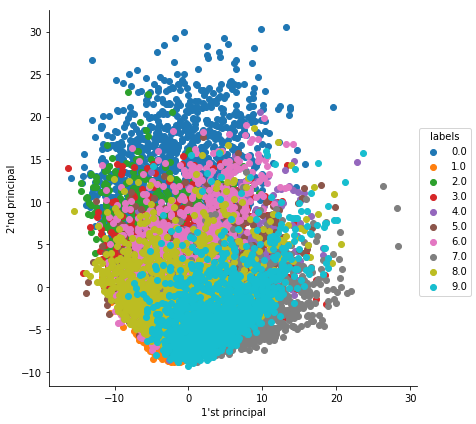

In [119]:
#plot the 2D data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe,hue = 'labels',size = 6).map(plt.scatter, "1'st principal","2'nd principal").add_legend()
plt.show()

# PCS using Scikit-Learn

In [121]:
from sklearn import decomposition
pca = decomposition.PCA()

In [123]:
#configure the parameters and components to 2
pca.n_components = 2
pca_data = pca.fit_transform(stand_data)#here no need to calcuate S and eighn vectors and 1st and 2nd

In [126]:
pca_data.shape

(15000, 2)

In [127]:
pca_data = np.vstack((pca_data.T,labels)).T

In [128]:
pca_data

array([[-5.04356354, -5.5580709 ,  1.        ],
       [19.3053125 ,  6.19404756,  0.        ],
       [-7.67879186, -1.91023931,  1.        ],
       ...,
       [-1.50728436, -2.1482801 ,  8.        ],
       [-6.53732631,  3.20390408,  9.        ],
       [-1.25626586, -6.87831479,  6.        ]])

In [130]:
pca_df = pd.DataFrame(data=pca_data,columns = ("1st","2nd","labels"))

In [131]:
pca_df

,1st,2nd,labels
0,-5.043564,-5.558071,1.0
1,19.305313,6.194048,0.0
2,-7.678792,-1.910239,1.0
3,-0.464827,5.526155,4.0
4,26.644303,6.366905,0.0
5,1.201326,-0.556185,0.0
6,-6.118920,6.440591,7.0
7,0.215502,4.420880,3.0
8,-0.724691,-1.315737,5.0
9,3.106101,-2.603434,3.0


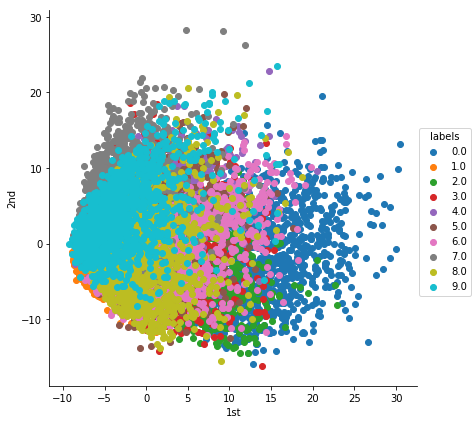

In [132]:
sn.FacetGrid(pca_df, hue="labels",size = 6).map(plt.scatter, '1st','2nd').add_legend()
plt.show()

# Graph between (no. of eighn values) & (dimensions)

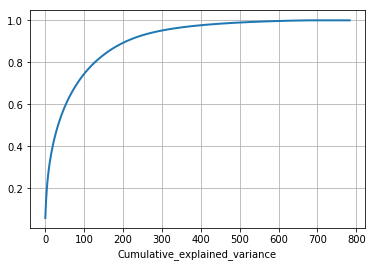

In [134]:
pca.n_components = 784
pca_data = pca.fit_transform(stand_data)
percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

#plot
plt.figure(1, figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.xlabel('Cumulative_explained_variance')
plt.show()

In [135]:
cum_var_explained

array([0.05912341, 0.10163512, 0.14132787, 0.17209801, 0.19854668,
       0.22161982, 0.24165727, 0.26025313, 0.2765261 , 0.29113307,
       0.30520514, 0.31787003, 0.32981028, 0.34139655, 0.35244798,
       0.36302904, 0.3729481 , 0.38263843, 0.39214002, 0.40137138,
       0.41016161, 0.41849267, 0.42649421, 0.43428587, 0.44196905,
       0.44922753, 0.45641669, 0.46347183, 0.47021043, 0.47678365,
       0.48318381, 0.48943375, 0.49551664, 0.50155604, 0.5074285 ,
       0.51327981, 0.51904759, 0.52469802, 0.5301854 , 0.53552956,
       0.54074286, 0.54582423, 0.55089526, 0.55587585, 0.56072347,
       0.56547308, 0.57020471, 0.57482968, 0.57937496, 0.58382282,
       0.58824245, 0.59259934, 0.59692058, 0.60109083, 0.60517271,
       0.60922592, 0.61324253, 0.61719243, 0.62107383, 0.62488471,
       0.62860624, 0.63228523, 0.63590085, 0.63943148, 0.64291806,
       0.64639468, 0.64981641, 0.65321635, 0.65654411, 0.65984987,
       0.66311127, 0.66634388, 0.66954524, 0.67264789, 0.67571

In [136]:
percentage_var_explained

array([5.91234057e-02, 4.25117187e-02, 3.96927453e-02, 3.07701430e-02,
       2.64486625e-02, 2.30731483e-02, 2.00374477e-02, 1.85958613e-02,
       1.62729721e-02, 1.46069626e-02, 1.40720701e-02, 1.26648917e-02,
       1.19402477e-02, 1.15862735e-02, 1.10514259e-02, 1.05810597e-02,
       9.91906618e-03, 9.69032614e-03, 9.50159377e-03, 9.23136172e-03,
       8.79022502e-03, 8.33105967e-03, 8.00153745e-03, 7.79166161e-03,
       7.68317904e-03, 7.25847927e-03, 7.18916409e-03, 7.05513749e-03,
       6.73859937e-03, 6.57321913e-03, 6.40016718e-03, 6.24993371e-03,
       6.08289698e-03, 6.03940032e-03, 5.87246076e-03, 5.85130681e-03,
       5.76777370e-03, 5.65043019e-03, 5.48738352e-03, 5.34415913e-03,
       5.21330312e-03, 5.08136713e-03, 5.07103091e-03, 4.98059156e-03,
       4.84761950e-03, 4.74961154e-03, 4.73162845e-03, 4.62497106e-03,
       4.54527634e-03, 4.44785866e-03, 4.41963364e-03, 4.35688568e-03,
       4.32124780e-03, 4.17024434e-03, 4.08188539e-03, 4.05320334e-03,
      